In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
df = pd.read_csv("DatosLimpios.csv",index_col=0)

In [18]:
df

,date_rptd,date_occ,time_occ,area,rpt_dist_no,part_1_2,crm_cd,mocodes,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,lat,lon,crm_cd_concat,ucr,premis
dr_no,,,,,,,,,,,,,,,,,,,
10304468,2020-01-08,2020-01-08,1350,3,Others,2,624,0444 0913,36.000000,F,B,501.0,400.0,AO,34.0141,-118.2978,624.0,SIMPLEASSAULT,vivienda
190101086,2020-01-02,2020-01-01,210,1,Others,2,624,0416 1822 1414,25.000000,M,H,102.0,500.0,IC,34.0459,-118.2545,624.0,SIMPLEASSAULT,calle
200110444,2020-04-14,2020-02-13,720,1,Others,2,845,1501,23.127650,X,X,726.0,0.0,AA,34.0448,-118.2474,845.0,Other,Others
191501505,2020-01-01,2020-01-01,1050,15,Others,2,745,0329 1402,76.000000,F,W,502.0,0.0,IC,34.1685,-118.4019,745.0998.0,Other,vivienda
191921269,2020-01-01,2020-01-01,255,19,Others,2,740,0329,31.000000,X,X,409.0,0.0,IC,34.2198,-118.4468,740.0,Other,establecimiento_publico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230405171,2023-02-05,2023-02-02,1110,4,Others,1,236,2000 1243 1241 0913 0400 0408 1814,41.000000,F,H,504.0,400.0,IC,34.0808,-118.1738,236.0,AGG. Assults,vivienda
231405429,2023-02-05,2023-02-05,770,14,Others,1,341,0325 0344,22.953462,X,X,402.0,0.0,IC,33.9846,-118.4428,341.0,OTHER THEFT,establecimiento_publico
231104474,2023-01-12,2023-01-12,760,11,Others,1,440,1822 0344,42.000000,M,W,101.0,0.0,IC,34.1214,-118.1915,440.0,OTHER THEFT,calle


In [5]:
X=df[['lat','lon']]

In [6]:
kmeans = kmeans=KMeans(n_clusters=5,init='k-means++',n_init=10,random_state=0)

In [7]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [8]:
df['zonas']=kmeans.labels_

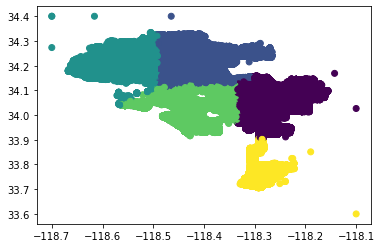

In [9]:
plt.scatter(df.lon,df.lat,c=df.zonas)
plt.show()

In [10]:
import pickle

In [11]:
#s = pickle.dumps(kmeans)

In [12]:
#df.zonas.to_csv('clusters.csv')

In [13]:
sumadelcuadradodeloscluster=[]
from sklearn.cluster import KMeans
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=0)
    kmeans.fit(X)
    sumadelcuadradodeloscluster.append(kmeans.inertia_)

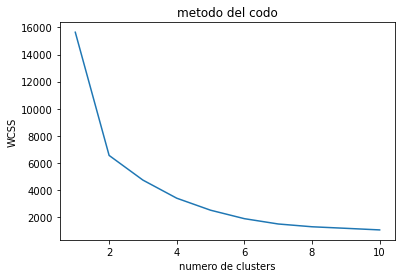

In [14]:
plt.plot(range(1,11),sumadelcuadradodeloscluster)
plt.title('metodo del codo')
plt.xlabel('numero de clusters')
plt.ylabel('WCSS')
plt.show()

<AxesSubplot:xlabel='lon', ylabel='lat'>

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


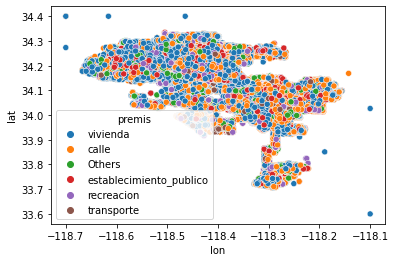

In [16]:
sns.scatterplot(df,x='lon',y='lat',hue='premis')

In [20]:
for i in range(5):
    temp=df[df.zonas==i]
    print(temp.area.value_counts())
    print(temp.time_occ.mean())
    print(temp.area.value_counts())

            date_rptd    date_occ  time_occ  area rpt_dist_no  part_1_2  \
dr_no                                                                     
10304468   2020-01-08  2020-01-08      1350     3      Others         2   
190101086  2020-01-02  2020-01-01       210     1      Others         2   
200110444  2020-04-14  2020-02-13       720     1      Others         2   
200100501  2020-01-02  2020-01-01        30     1      Others         1   
200100502  2020-01-02  2020-01-02       795     1      Others         1   
...               ...         ...       ...   ...         ...       ...   
231304127  2023-01-02  2023-01-02       550    13      Others         2   
231306158  2023-02-11  2023-02-08      1320    13      Others         1   
230400689  2023-02-25  2023-02-25      1135     4      Others         2   
230405171  2023-02-05  2023-02-02      1110     4      Others         1   
231104474  2023-01-12  2023-01-12       760    11      Others         1   

           crm_cd       

In [ ]:
df.date_rptd.mean()